<a href="https://colab.research.google.com/github/baut-jc/DDDS-My-Projects/blob/main/Project-4/Project_4_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Spotify

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

**Business Problem:** A record label or artist wants to forecast the potential popularity of a new song *before* its release to make informed marketing and strategic decisions.

**Data Science Problem:** This is a **supervised regression** task.

* It's **supervised** because we have a dataset
with features and a known target variable (*"Popularity"*).

* It's **regression** because "Popularity" is a continuous numerical value, not a category.

**Primary Goal:** Minimize the Root Mean Squared Error (RMSE) when predicting the "Popularity" score.

**Secondary Goal:** Identify which audio features are most influential in predicting popularity.

## Data Collection/Sources


#### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pickle

In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: j37rbhGNyRAAkwizbpbLbNtMkHiGESGFORo8Powyu9G415t+8zSrmDwdAhbJ5EvQm7ly9Si+bsRa6sGH0ODzZm25YDmXQbYcepybEWmYnjQ=
x-amz-request-id: 9N75D9QE7SZCY2B1
Date: Mon, 07 Jul 2025 16:07:55 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [ ]:
!curl -s -O {url}

In [ ]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Jul  7 14:15 ./
drwxr-xr-x 1 root root   4096 Jul  7 14:13 ../
drwxr-xr-x 4 root root   4096 Jul  1 21:04 .config/
drwxr-xr-x 1 root root   4096 Jul  1 21:04 sample_data/
-rw-r--r-- 1 root root 738124 Jul  7 16:07 Spotify.csv


In [ ]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


#### S.H.I.D

In [ ]:
df = pd.read_csv( url )
df.shape

(1556, 23)

In [ ]:
df.head()

Index  Highest Charting Position  Number of Times Charted  \
0      1                          1                        8   
1      2                          2                        3   
2      3                          1                       11   
3      4                          3                        5   
4      5                          5                        1   

  Week of Highest Charting                          Song Name     Streams  \
0   2021-07-23--2021-07-30                            Beggin'  48,633,449   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47,248,719   
2   2021-06-25--2021-07-02                           good 4 u  40,162,559   
3   2021-07-02--2021-07-09                         Bad Habits  37,799,456   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33,948,454   

           Artist Artist Followers                 Song ID  \
0        Måneskin          3377762  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI          2230022  5HCyWlXZPP0y6Gqq8TgA20   
2  Olivia Rodrigo          6266514  4ZtFanR9U6ndgddUvNcjcG   
3      Ed Sheeran         83293380  6PQ88X9TkUIAUIZJHW2upE   
4       Lil Nas X          5473565  27NovPIUIRrOZoCHxABJwK   

                                    Genre  ... Danceability Energy Loudness  \
0  ['indie rock italiano', 'italian pop']  ...        0.714    0.8   -4.808   
1                  ['australian hip hop']  ...        0.591  0.764   -5.484   
2                                 ['pop']  ...        0.563  0.664   -5.044   
3                       ['pop', 'uk pop']  ...        0.808  0.897   -3.712   
4           ['lgbtq+ hip hop', 'pop rap']  ...        0.736  0.704   -7.409   

  Speechiness Acousticness Liveness    Tempo Duration (ms) Valence  Chord  
0      0.0504        0.127    0.359  134.002        211560   0.589      B  
1      0.0483       0.0383    0.103  169.928        141806   0.478  C#/Db  
2       0.154        0.335   0.0849  166.928        178147   0.688      A  
3      0.0348       0.0469    0.364  126.026        231041   0.591      B  
4      0.0615       0.0203   0.0501  149.995        212000   0.894  D#/Eb  

[5 rows x 23 columns]

In [ ]:
df.info()

# many objects that may need to be converted into --> ints/float(numeric)
# .drop() --> Song ID,Index,
# Chord may nto be necessary; but what effect might it do with Streams... maybe even Energy and Liveness.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
df.describe().transpose().sort_values( by = ["mean"])

count        mean         std  min     25%    50%  \
Number of Times Charted    1556.0   10.668380   16.360546  1.0    1.00    4.0   
Highest Charting Position  1556.0   87.744216   58.147225  1.0   37.00   80.0   
Index                      1556.0  778.500000  449.322824  1.0  389.75  778.5   

                               75%     max  
Number of Times Charted      12.00   142.0  
Highest Charting Position   137.00   200.0  
Index                      1167.25  1556.0

## Data Cleaning


In [ ]:
df.nunique().sort_values(ascending = False)

# streams/song name could be the target
#will i know this feature that may have affected the target.

Index                        1556
Streams                      1556
Song Name                    1556
Song ID                      1517
Duration (ms)                1486
Tempo                        1461
Loudness                     1394
Acousticness                  965
Weeks Charted                 775
Speechiness                   772
Valence                       732
Artist                        716
Liveness                      606
Artist Followers              600
Energy                        575
Danceability                  530
Release Date                  478
Genre                         395
Highest Charting Position     200
Week of Highest Charting       83
Number of Times Charted        75
Popularity                     70
Chord                          13
dtype: int64

In [ ]:
df['Streams']

0       48,633,449
1       47,248,719
2       40,162,559
3       37,799,456
4       33,948,454
           ...    
1551     4,630,675
1552     4,623,030
1553     4,620,876
1554     4,607,385
1555     4,595,450
Name: Streams, Length: 1556, dtype: object

#### Data Types Conversion

In [ ]:
## Columns like 'Streams' and 'Artist Followers' have commas. Remove them and convert to numbers.

df['Streams'] = pd.to_numeric(df['Streams'].str.replace(',', ''))
df['Artist Followers'] = pd.to_numeric(df['Artist Followers'].str.replace(',', ''), errors='coerce')


In [ ]:
# Convert all audio feature columns from 'object' to numeric.
# Using errors='coerce' will turn any problematic values into 'NaN' (Not a Number),
# which we can handle next.

audio_features = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
                  'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']
for col in audio_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.sample(7)

Index  Highest Charting Position  Number of Times Charted  \
1412   1413                        116                        1   
678     679                        150                        1   
1152   1153                        123                        1   
1542   1543                        192                        2   
851     852                         65                        1   
1374   1375                        140                        9   
934     935                        117                       16   

     Week of Highest Charting                           Song Name  Streams  \
1412   2020-02-14--2020-02-21                        Confirmation  6520106   
678    2020-12-18--2020-12-25           Naughty List (with Dixie)  7299201   
1152   2020-05-22--2020-05-29                           Komm Komm  5552890   
1542   2019-12-27--2020-01-03                            Fantasía  4543012   
851    2020-10-02--2020-10-09  Rich Nigga Shit (feat. Young Thug)  9129562   
1374   2020-01-31--2020-02-07               You Need To Calm Down  5115153   
934    2020-06-26--2020-07-03                                 PAM  4501441   

                                    Artist  Artist Followers  \
1412                         Justin Bieber        48544923.0   
678                             Liam Payne         8037861.0   
1152                           Capital Bra         4093115.0   
1542                                 Ozuna        29238936.0   
851                21 Savage, Metro Boomin         9949044.0   
1374                          Taylor Swift        42227614.0   
934   Justin Quiles, Daddy Yankee, El Alfa         2897862.0   

                     Song ID  \
1412  60brXKLTC15vK0av5gIldm   
678   2Y0ktCGrGoGcQFXsGztvhi   
1152  3US6RbELvvrPw3DcvtJmis   
1542  40rXWke6SnXiGkSmaT8ZUr   
851   3ruoIF2UnoXdzK8mR61ebq   
1374  6RRNNciQGZEXnqk8SQ9yv5   
934   0eeKDrQxjqNl5bX5VCHDcn   

                                                  Genre  ... Danceability  \
1412           ['canadian pop', 'pop', 'post-teen pop']  ...        0.438   
678               ['dance pop', 'pop', 'post-teen pop']  ...        0.619   
1152                                 ['german hip hop']  ...        0.485   
1542  ['latin', 'puerto rican pop', 'reggaeton', 'tr...  ...        0.695   
851           ['atl hip hop', 'hip hop', 'rap', 'trap']  ...        0.825   
1374                           ['pop', 'post-teen pop']  ...        0.771   
934               ['latin', 'reggaeton', 'trap latino']  ...        0.889   

     Energy  Loudness  Speechiness  Acousticness  Liveness    Tempo  \
1412  0.315    -8.186       0.0375       0.60800    0.1510  190.064   
678   0.771    -2.204       0.0601       0.03180    0.1140   81.966   
1152  0.793    -3.836       0.4260       0.25100    0.1460   87.629   
1542  0.719    -5.938       0.0903       0.22700    0.0884  180.074   
851   0.733    -5.625       0.0969       0.34900    0.1120   97.974   
1374  0.671    -5.617       0.0553       0.00929    0.0637   85.026   
934   0.863    -3.011       0.0757       0.28900    0.0798  112.953   

      Duration (ms)  Valence  Chord  
1412       170587.0    0.449  G#/Ab  
678        154747.0    0.704      A  
1152       160667.0    0.371      B  
1542       175187.0    0.781      D  
851        190331.0    0.620  C#/Db  
1374       171360.0    0.714      D  
934        201000.0    0.776      B  

[7 rows x 23 columns]

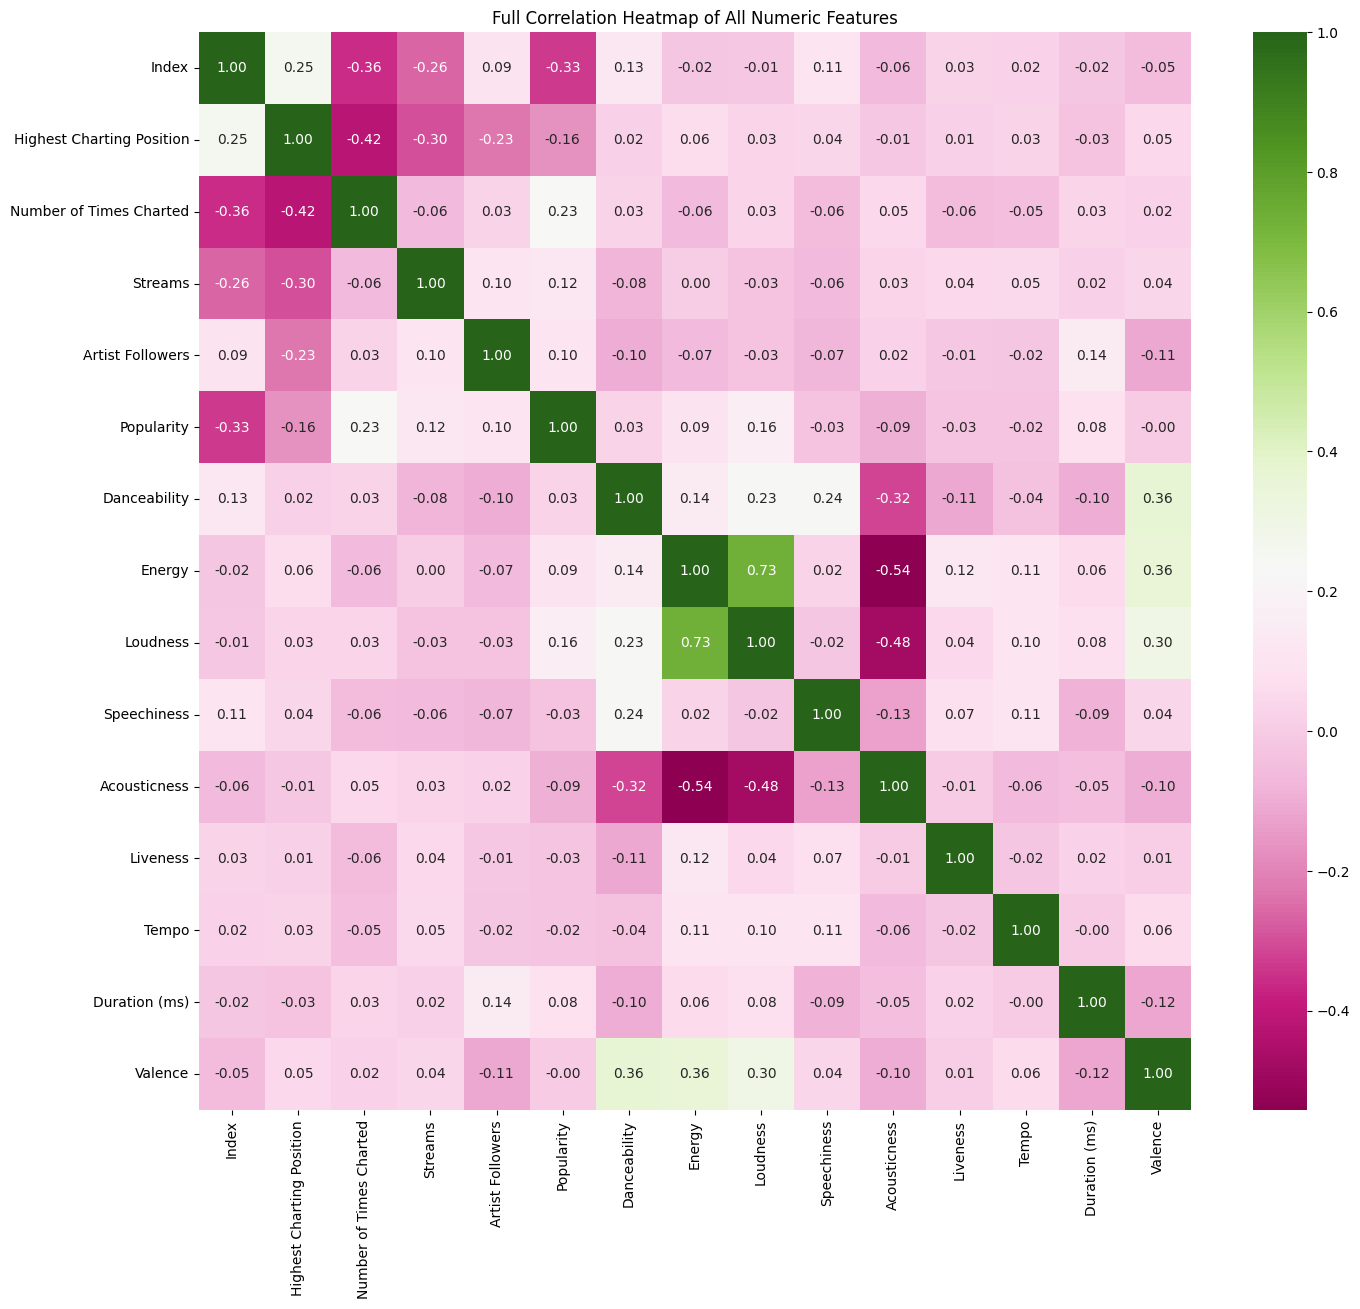

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=np.number)

# Create the correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix,
    annot=True,      # This adds the numbers to the squares
    fmt='.2f',       # Format numbers to 2 decimal places
    cmap='PiYG'   # Color scheme
)
plt.title('Full Correlation Heatmap of All Numeric Features')
plt.show()

#### Remove NULLS

In [ ]:
df_clean = df.copy()
df_clean.isnull().sum()

Index                         0
Highest Charting Position     0
Number of Times Charted       0
Week of Highest Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist Followers             11
Song ID                       0
Genre                         0
Release Date                  0
Weeks Charted                 0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
Chord                         0
dtype: int64

In [ ]:
#fill missing numeric values with median by column.

for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # df[col].fillna(df[col].median(), inplace=True)
        df.fillna({col: df[col].median()}, inplace=True)

df.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

#### Convert Dates for features

## Exploratory Data Analysis


In [ ]:
# 28 nulls from 'Release Date'
# date conversion (2.2d)

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Date']

0      2017-12-08
1      2021-07-09
2      2021-05-21
3      2021-06-25
4      2021-07-23
          ...    
1551   2017-06-02
1552   2019-10-11
1553   2018-01-12
1554   2019-09-25
1555   2019-11-13
Name: Release Date, Length: 1556, dtype: datetime64[ns]

In [ ]:
# extract year and month from dates

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release_Year'] = df['Release Date'].dt.year
df['Release_Month'] = df['Release Date'].dt.month

df[['Release Date', 'Release_Year', 'Release_Month']]

Release Date  Release_Year  Release_Month
0      2017-12-08        2017.0           12.0
1      2021-07-09        2021.0            7.0
2      2021-05-21        2021.0            5.0
3      2021-06-25        2021.0            6.0
4      2021-07-23        2021.0            7.0
...           ...           ...            ...
1551   2017-06-02        2017.0            6.0
1552   2019-10-11        2019.0           10.0
1553   2018-01-12        2018.0            1.0
1554   2019-09-25        2019.0            9.0
1555   2019-11-13        2019.0           11.0

[1556 rows x 3 columns]

####Feature Selection

In [ ]:
target = 'Popularity'

# Drop features that useful for prediction.
features_to_drop = [
    'Index', 'Highest Charting Position', 'Number of Times Charted',
    'Week of Highest Charting', 'Song Name', 'Streams', 'Song ID',
    'Artist', 'Genre', 'Release Date', 'Weeks Charted', 'Chord'
]

predictors = df.drop(columns=[target] + features_to_drop)

predictors

Artist Followers  Danceability  Energy  Loudness  Speechiness  \
0            3377762.0         0.714   0.800    -4.808       0.0504   
1            2230022.0         0.591   0.764    -5.484       0.0483   
2            6266514.0         0.563   0.664    -5.044       0.1540   
3           83293380.0         0.808   0.897    -3.712       0.0348   
4            5473565.0         0.736   0.704    -7.409       0.0615   
...                ...           ...     ...       ...          ...   
1551        27167675.0         0.762   0.700    -6.021       0.0694   
1552        15019109.0         0.528   0.870    -3.123       0.0851   
1553        22698747.0         0.765   0.523    -4.333       0.0300   
1554          208630.0         0.832   0.550    -7.026       0.0587   
1555        42227614.0         0.448   0.603    -7.176       0.0640   

      Acousticness  Liveness    Tempo  Duration (ms)  Valence  Release_Year  \
0          0.12700    0.3590  134.002       211560.0    0.589        2017.0   
1          0.03830    0.1030  169.928       141806.0    0.478        2021.0   
2          0.33500    0.0849  166.928       178147.0    0.688        2021.0   
3          0.04690    0.3640  126.026       231041.0    0.591        2021.0   
4          0.02030    0.0501  149.995       212000.0    0.894        2021.0   
...            ...       ...      ...            ...      ...           ...   
1551       0.00261    0.1530  116.073       209320.0    0.608        2017.0   
1552       0.24000    0.3330  152.370       181930.0    0.714        2019.0   
1553       0.18400    0.1320  104.988       217307.0    0.394        2018.0   
1554       0.24900    0.1820  154.064       152784.0    0.881        2019.0   
1555       0.43300    0.0862  205.272       221307.0    0.422        2019.0   

      Release_Month  
0              12.0  
1               7.0  
2               5.0  
3               6.0  
4               7.0  
...             ...  
1551            6.0  
1552           10.0  
1553            1.0  
1554            9.0  
1555           11.0  

[1556 rows x 12 columns]

In [37]:
df_cleaned = df.copy()

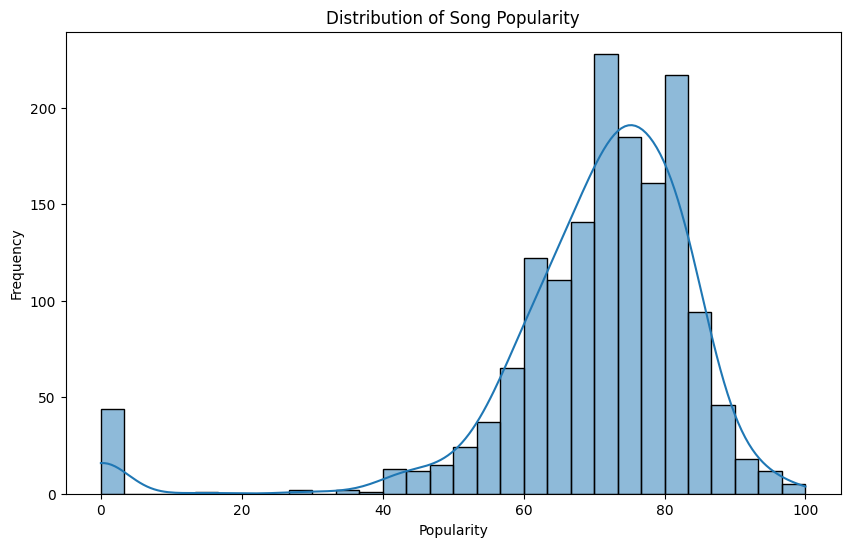

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

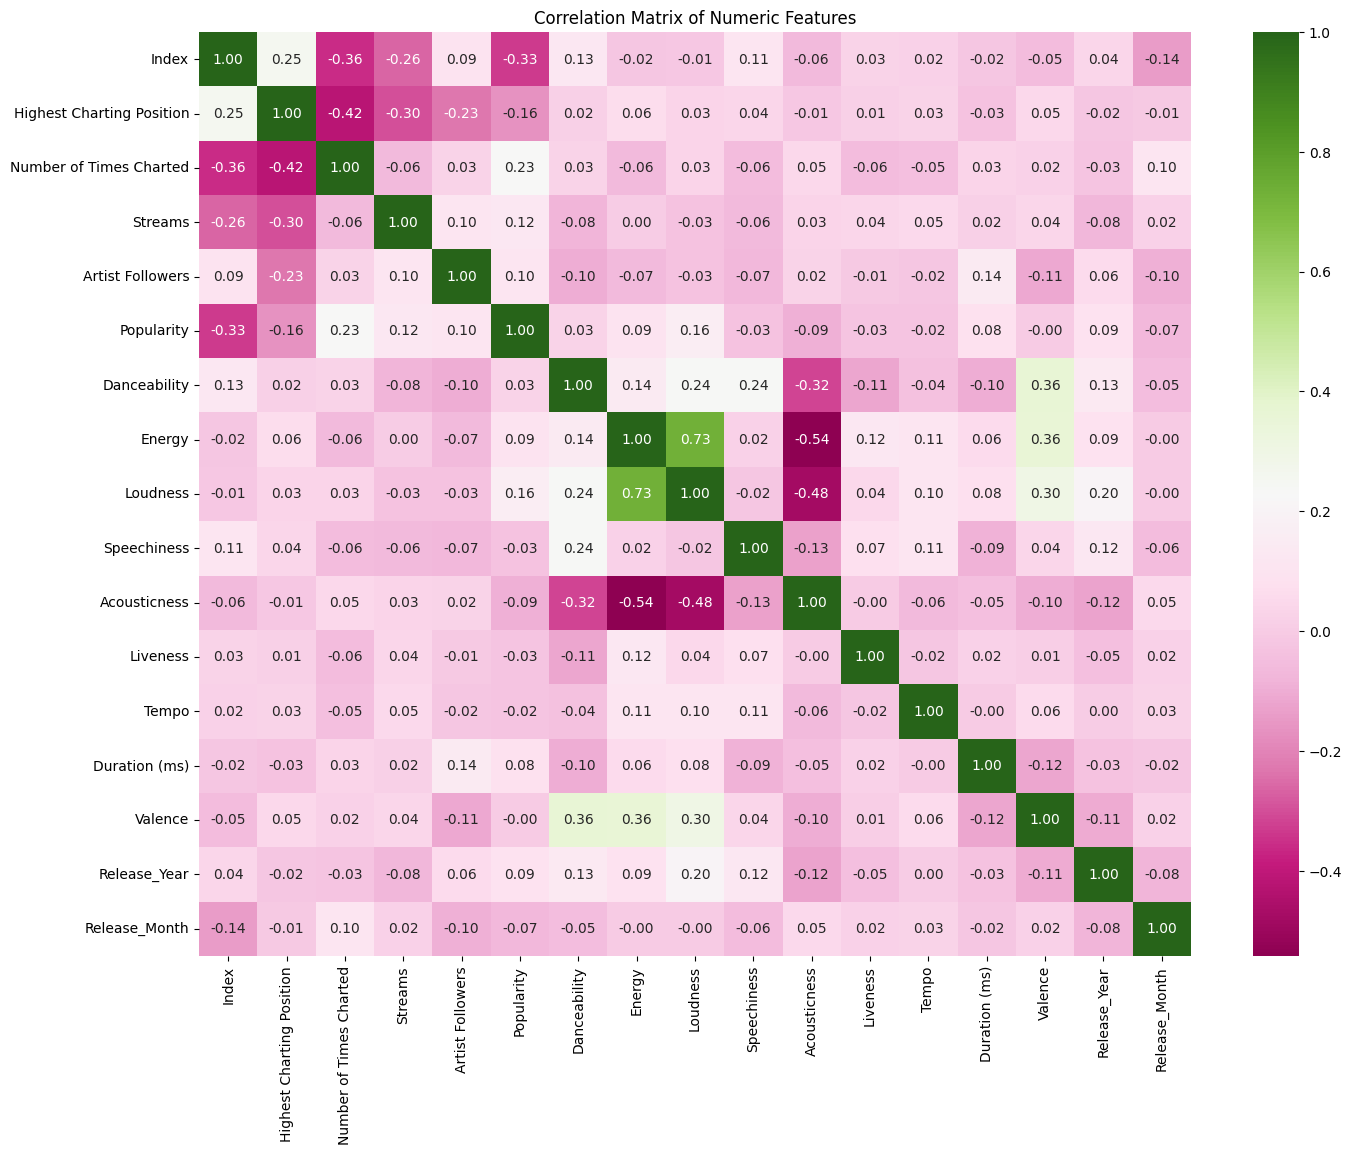

In [41]:
plt.figure(figsize=(16, 12))
numeric_cols = df_cleaned.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

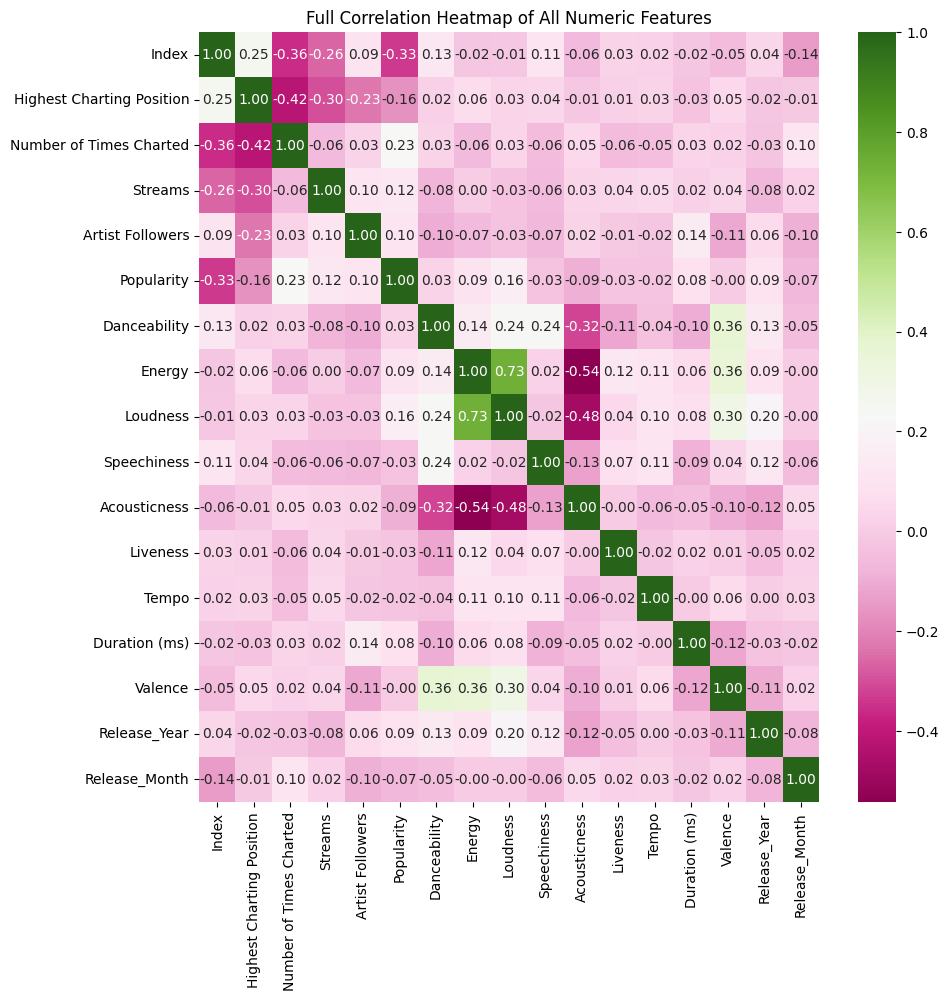

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns for the correlation matrix
numeric_df = df_cleaned.select_dtypes(include=np.number)

# Create the correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(
    corr_matrix,
    annot=True,      # This adds the numbers to the squares
    fmt='.02f',       # Format numbers to 2 decimal places
    cmap='PiYG'   # Color scheme
)
plt.title('Full Correlation Heatmap of All Numeric Features')
plt.show()

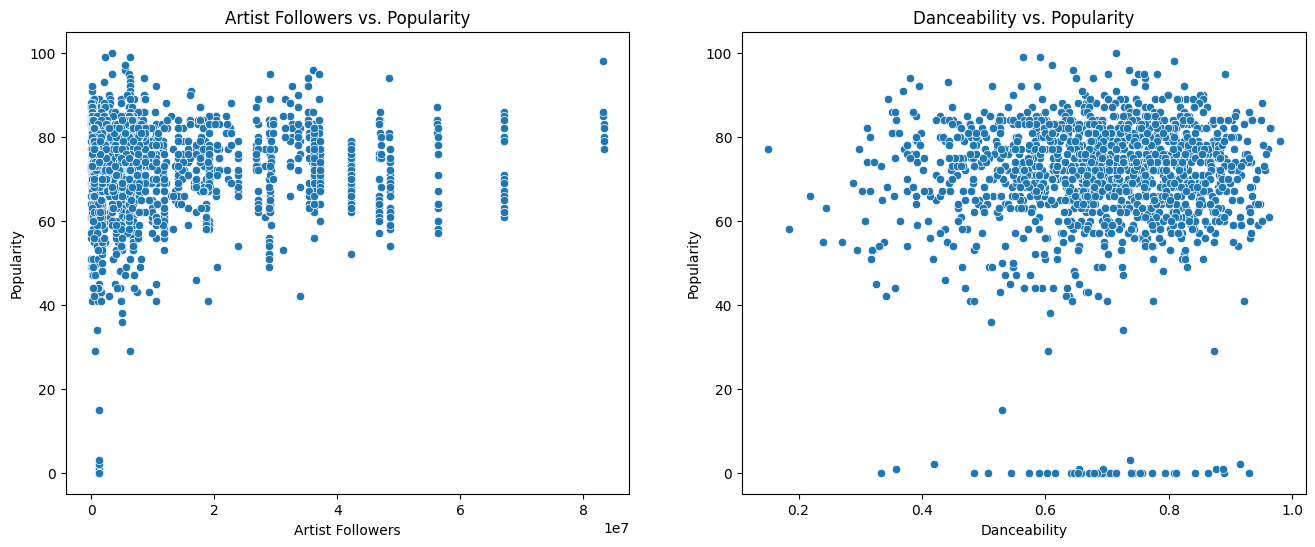

In [46]:
# Let's assume the heatmap showed 'Artist Followers' and 'Danceability' are correlated with 'Popularity'
plt.figure(figsize=(16, 6))

# Plot Artist Followers vs. Popularity
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_cleaned['Artist Followers'], y=df_clean['Popularity'])
plt.title('Artist Followers vs. Popularity')

# Plot Danceability vs. Popularity
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_cleaned['Danceability'], y=df_clean['Popularity'])
plt.title('Danceability vs. Popularity')

plt.show()

#### Feature Engineering & Modeling

The 'Genre' and 'Chord' columns are dcategorical. I'll use one-hot encoding to convert them into a format the model can use. Then, I'll split the data and train two models: Linear Regression and Random Forest.

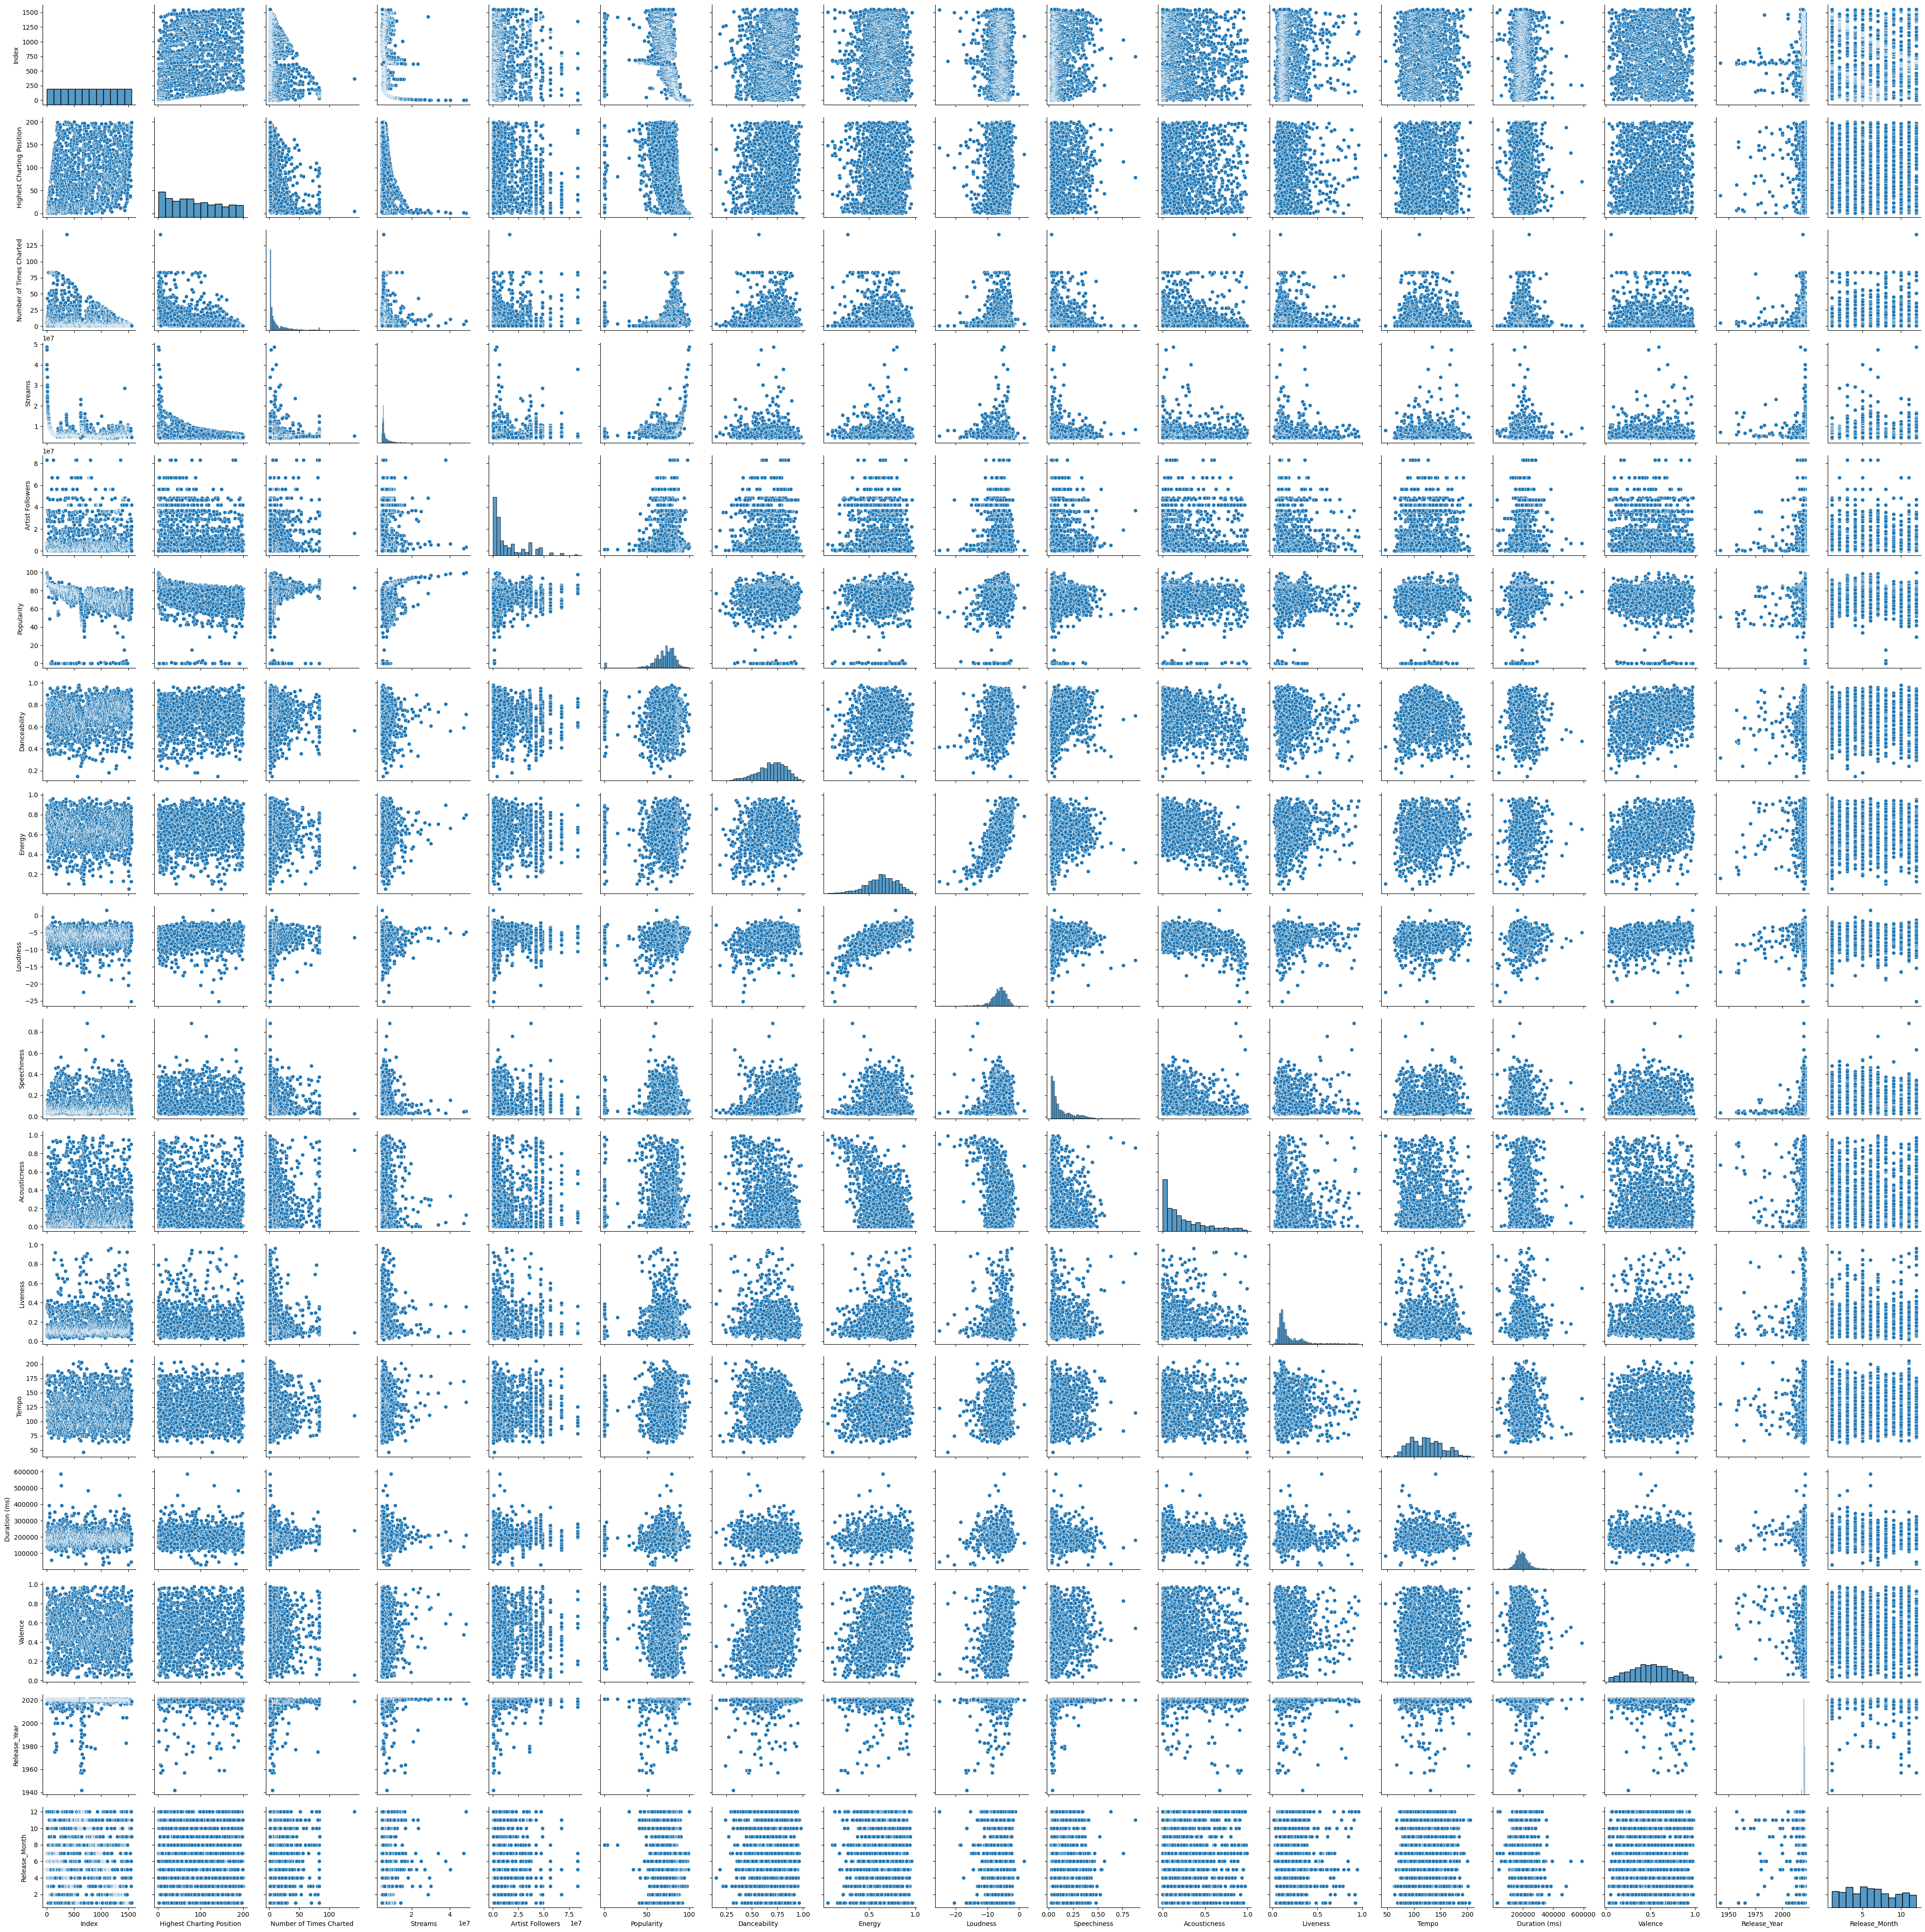

In [47]:
import seaborn as sns

sns.pairplot(df_cleaned)

In [48]:
df_model = pd.get_dummies(df_cleaned, columns=['Genre', 'Chord'], drop_first=True)

print(f"Shape of the dataframe after one-hot encoding: {df_model.shape}")

Shape of the dataframe after one-hot encoding: (1556, 429)


In [ ]:
# sns.pairplot(df_model)

In [ ]:
# corr plot to different target to compare what features may be affective to distinguish and compare features

## Processing



#### Use Sklearn

to train-test-split.

In [49]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#Use Sklearn

In [50]:
# X = df_clean.drop(['Popularity', 'Release Date'], axis=1)
X = df_cleaned.select_dtypes(include=[np.number])
y = df_cleaned['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

In [52]:
# Handle missing values in X_train and X_test
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or use median if outliers are an issue
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

In [53]:
# # Model 1: Linear Regression
# # lr = LinearRegression()
# lr.fit(X_train, y_train)
# lr_preds = lr.predict(X_test)
# lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

( myfit2.intercept_, myfit2.coef_ )

# print(f"Linear Regression RMSE: {lr_rmse}")

(np.float64(-4.973799150320701e-13),
 array([-7.67240592e-17,  4.03134320e-16,  2.50946176e-15, -3.71392722e-21,
        -1.61735386e-21,  1.00000000e+00, -3.14011160e-14, -3.90474811e-14,
         4.51337064e-15, -5.16455798e-14, -2.13660055e-14,  9.22121601e-15,
        -3.54943792e-16,  3.13435748e-18, -4.57647643e-16,  2.02355859e-17,
        -1.88637965e-16]))

In [ ]:
numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3)         # Arbitrarily choosing max_depth of 3
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)*1000}")


## Data Visualization/Communication of Results
